In [6]:
import tensorflow.compat.v2 as tf
from tensorflow.keras import datasets, layers, models
from sklearn import tree
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

tf.enable_v2_behavior()

In [7]:
import cv2 
import numpy as np
import random

In [62]:
num_of_letters = 26
num_of_train_images = 200
num_of_test_images = 1000
num_of_train_images_ub = 200
num_of_augs = 0
dataset_type_train = 3
dataset_type_test = 1
dataset_type_train_ub = 1
batch_size = 32
biased_ratio = 50
add_unbiased = 0
test_degree = 2
train_degree = 3
max_num = 2
testOrTrain = 1
times_addition = 0
alphabetOrSpots = 1
f1Values = [0]
f1MaxValues = [0]

In [9]:
def basicText(text, fontScale, x_direction, y_direction):
  image = np.zeros((64,64))
  # font 
  font = cv2.FONT_HERSHEY_SIMPLEX 
  org = (x_direction,y_direction)  
  color = (255, 255)  
  thickness = 2
  image = cv2.putText(image, text, org, font, fontScale,  
                 color, thickness, cv2.LINE_AA, False)
  return image 

In [10]:
def imageWithDots():
  image = np.zeros((64,64))
  # font 
  color = (255, 255)  
  thickness = 2
  text = '.'
  font = cv2.FONT_HERSHEY_SIMPLEX 
  for i in range(15):
    x_direction = random.randint(0, 63)
    y_direction = random.randint(0, 63)
    org = (x_direction,y_direction)  
    image = cv2.putText(image, text, org, font, 1,  
                  color, thickness, cv2.LINE_AA, False)
  return image 

In [11]:
def resizeImage(image, num, place):
  new2 = cv2.resize(image,None,fx=1/num, fy=1/num, interpolation = cv2.INTER_CUBIC)
  new2 = new2.reshape(new2.shape[0], new2.shape[1])
  image1 = np.zeros((64,64))
  image1[(new2.shape[0]*place):(new2.shape[0]*(place+1)),(new2.shape[0]*place):(new2.shape[0]*(place+1))] = new2
  return image1

In [12]:
def resizeImageForFour(image, num):
  new2 = cv2.resize(image,None,fx=1/num, fy=1/num, interpolation = cv2.INTER_CUBIC)
  new2 = new2.reshape(new2.shape[0], new2.shape[1])
  return new2

In [13]:
def rotateImage(image, angle):
  row,col = image.shape
  center=tuple(np.array([row,col])/2)
  rot_mat = cv2.getRotationMatrix2D(center,angle,1.0)
  new_image = cv2.warpAffine(image, rot_mat, (col,row))
  new_image = new_image.reshape(new_image.shape[0], new_image.shape[1])
  return new_image

In [14]:
def matrixCreation(matrixDegree, maxObjectCombinations):
  if matrixDegree == 1:
    arr = np.zeros(num_of_letters)
    valueDef = np.zeros(num_of_letters)
    loopNum = np.floor (num_of_letters/maxObjectCombinations)
  elif matrixDegree == 2:
    arr = np.zeros((num_of_letters, num_of_letters))
    valueDef = np.zeros((num_of_letters, num_of_letters))
    loopNum = np.floor  (((num_of_letters*num_of_letters) - num_of_letters)/(maxObjectCombinations*2))
  elif matrixDegree == 3:
    arr = np.zeros((num_of_letters, num_of_letters, num_of_letters))
    valueDef = np.zeros((num_of_letters, num_of_letters, num_of_letters))
    loopNum = np.floor(((num_of_letters*(num_of_letters-1)*(num_of_letters-2)))/(maxObjectCombinations*2*3))
  elif matrixDegree == 4:
    arr = np.zeros((num_of_letters, num_of_letters, num_of_letters, num_of_letters))
    valueDef = np.zeros((num_of_letters, num_of_letters, num_of_letters, num_of_letters))
    loopNum = np.floor  (((num_of_letters*(num_of_letters-1)*(num_of_letters-2)*(num_of_letters-4)))/(maxObjectCombinations*2*3*4))
  for i in range(maxObjectCombinations):
    numOfComb = 0
    while numOfComb < loopNum:
      if matrixDegree == 1:
        rowNum = random.randint(0, (num_of_letters - 1))
        if valueDef[rowNum] == 0:
          valueDef[rowNum] = 1
          arr[rowNum] = i
          numOfComb = numOfComb +1
      elif matrixDegree == 2:
        rowNum = random.randint(0, (num_of_letters - 1))
        colNum = random.randint(0, (num_of_letters - 1))
        if valueDef[rowNum][colNum] == 0 and valueDef[colNum][rowNum] == 0 and rowNum != colNum:
          if rowNum < colNum :
            valueDef[rowNum][colNum]  = 1
            arr[rowNum][colNum]  = i
          else:
            valueDef[colNum][rowNum]  = 1
            arr[colNum][rowNum]  = i
          numOfComb = numOfComb +1
      elif matrixDegree == 3:
        rowNum = random.randint(0, (num_of_letters - 1))
        htNum = random.randint(0, (num_of_letters - 1))
        colNum = random.randint(0, (num_of_letters - 1))
        if valueDef[rowNum][colNum][htNum] == 0 and valueDef[colNum][rowNum][htNum] == 0 and valueDef[htNum][rowNum][colNum] == 0 and valueDef[colNum][htNum][rowNum] == 0 and valueDef[htNum][colNum][rowNum] == 0 and valueDef[rowNum][htNum][colNum] == 0 and not (rowNum == colNum or rowNum == htNum or htNum == colNum):
          listVal = [rowNum, colNum, htNum]
          listVal.sort()
          valueDef[listVal[0]][listVal[1]][listVal[2]] = 1
          arr[listVal[0]][listVal[1]][listVal[2]] = i
          numOfComb = numOfComb + 1
      elif matrixDegree == 4:
        rowNum = random.randint(0, (num_of_letters - 1))
        htNum = random.randint(0, (num_of_letters - 1))
        colNum = random.randint(0, (num_of_letters - 1))
        wdNum = random.randint(0, (num_of_letters - 1))
        if valueDef[rowNum][colNum][htNum][wdNum] == 0 and (rowNum != colNum or rowNum != htNum or htNum != colNum or wdNum != colNum or rowNum != wdNum or htNum != wdNum):
          valueDef[rowNum][colNum][htNum][wdNum]= 1
          arr[rowNum][colNum][htNum][wdNum] = i
          numOfComb = numOfComb +1
  return np.array(arr)

In [15]:
array = matrixCreation(3, 2)
sum(sum(array))

array([  0.,   0.,   0.,   1.,   1.,   7.,   8.,  11.,  17.,  16.,  26.,
        34.,  40.,  38.,  43.,  50.,  57.,  64.,  76.,  87.,  92., 109.,
       118., 110., 142., 153.])

In [16]:
def genAlphabetImage(text):
  val = chr(text)
  x_direction = random.randint(0, 32)
  y_direction = random.randint(28,55)
  image = basicText(val, 1, x_direction, y_direction)
  return image

In [71]:
def genImage(letterList, numOfTimes):
  finalImage = np.zeros((64,64))
  valList = [[0,0],[0,32],[32,0],[32,32]]
  label = np.zeros(num_of_letters)
  temp = ''
  letterList = list(dict.fromkeys(letterList))
  random.shuffle(valList)
  random.shuffle(letterList)
  for j in range(len(letterList)):
    if alphabetOrSpots == 1:
      img = genAlphabetImage((65 + letterList[j]))
    elif alphabetOrSpots == 0:
      img = imageWithDots()
    label[letterList[j]] = 1
    resizeImage = resizeImageForFour(img, 2)
    finalImage[valList[j][0]:valList[j][0] + 32,valList[j][1]:valList[j][1] + 32] = resizeImage
    temp = temp + chr(65 + letterList[j]) + '_'
  temp = temp + str(numOfTimes)+'_'+str(testOrTrain)+'.jpg'
  cv2.imwrite('Images/{}'.format(str(temp)), finalImage)
  return finalImage, np.array(label), temp

In [18]:
alphabetOrSpots = 1
genImage([2,3,4], 1)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'E_C_D_1_1.jpg')

In [19]:
def imageGenBasedOnMatrix(matrixDegree, arrayVal):
  images = []
  labels = []
  imageNames = []
  letterList = []
  if matrixDegree == 1:
    for i in range(len(arrayVal)):
      letterList.clear()
      letterList.append(i)
      for j in range(int(arrayVal[i])):
        image, label, imageName = genImage(letterList, j)
        images.append(image)
        labels.append(label)
        imageNames.append(imageName)
  elif matrixDegree == 2:
    for i in range(arrayVal.shape[0]):
      for j in range(arrayVal.shape[1]):
        for k in range(int(arrayVal[i][j])):
          letterList = [i, j]
          random.shuffle(letterList)
          image, label, imageName = genImage(letterList, k)
          images.append(image)
          labels.append(label)
          imageNames.append(imageName)
  elif matrixDegree == 3:
    for i in range(arrayVal.shape[0]):
      for j in range(arrayVal.shape[1]):
        for k in range(arrayVal.shape[2]):
          for l in range(int(arrayVal[i][j][k])):
            letterList = [i,j,k]
            random.shuffle(letterList)
            image, label, imageName = genImage(letterList, l)
            images.append(image)
            labels.append(label)
            imageNames.append(imageName)
  elif matrixDegree == 4:
    for i in range(arrayVal.shape[0]):
      for j in range(arrayVal.shape[1]):
        for k in range(arrayVal.shape[2]):
          for m in range(arrayVal.shape[3]):
            for l in range(int(arrayVal[i][j][k][m])):
              letterList = [i,j,k,m]
              random.shuffle(letterList)
              image, label, imageName = genImage(letterList, l)
              images.append(image)
              labels.append(label)
              imageNames.append(imageName)
  return images, labels, imageNames

In [20]:
def parse_function(filename, label):
    # Read an image from a file
    image_string = tf.io.read_file(filename)
    # Decode it into a dense vector
    image_decoded = tf.image.decode_jpeg(image_string, channels=1)
    # Resize it to fixed shape
    image_resized = tf.image.resize(image_decoded, [32, 32])
    # Normalize it from [0, 255] to [0.0, 1.0]
    image_normalized = image_resized / 255.0
    image_normalized = tf.image.convert_image_dtype(image_normalized, dtype=tf.float32)
    return image_normalized, label

In [66]:
def create_dataset(filenames, labels, is_training=True):    
    # Create a first dataset of file paths and labels
    dataset = tf.data.Dataset.from_tensor_slices((filenames, labels))
    # Parse and preprocess observations in parallel
    dataset = dataset.map(parse_function, num_parallel_calls=tf.data.experimental.AUTOTUNE )
    dataset = dataset.cache()
    if (is_training):
      dataset = dataset.shuffle(20000, reshuffle_each_iteration=True)
    # Batch the data for multiple steps
    dataset = dataset.batch(batch_size)
    # Fetch batches in the background while the model is training.
    dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE) 
    return dataset

In [22]:
def modelDef():
  model = models.Sequential()
  model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(32,32,1)))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Conv2D(filters=48, kernel_size=(3, 3), activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  #model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu"))
  #model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(num_of_letters, activation='sigmoid'))
  model.summary()
  return model

In [23]:
def modelDefNew():
  model = models.Sequential()
  model.add(layers.Conv2D(filters=64, kernel_size=(5, 5), activation="relu", input_shape=(32,32,1)))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  #model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu"))
  #model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(num_of_letters, activation='sigmoid'))
  model.summary()
  return model

In [24]:
def Sort(sub_li): 
    l = len(sub_li) 
    for i in range(0, l): 
        for j in range(0, l-i-1): 
            if (sub_li[j][1] > sub_li[j + 1][1]): 
                tempo = sub_li[j] 
                sub_li[j]= sub_li[j + 1] 
                sub_li[j + 1]= tempo 
    return sub_li 

In [25]:
def calculate_labels(pred):
  predict_labels = []
  for i in range(0, len(pred)):
    temp = pred[i]
    val = 0.5
    labels = np.zeros(num_of_letters)
    for j in range(0, num_of_letters):
      if(temp[j] >= val):
        labels[j] = 1
    predict_labels.append(labels)
  return predict_labels

In [26]:
def label_to_alphabet(cal):
  predictedLabels = []
  for i in range(0, len(cal)):
    setList = []
    for j in range(0, num_of_letters):
      if(cal[i][j] == 1):
        temp = chr(j + 65)
        setList.append(temp)
    predictedLabels.append(set(setList))
  return predictedLabels

In [27]:
def f1score(y_test, y_predicted, array):
  global f1Values
  global f1MaxValues
  temp_f1 = 0
  temp_recall = 0
  temp_precision = 0
  temp_acc = 0
  f1Val = []
  distVal = []
  for i in range(len(y_test)):
    temp_f1 = temp_f1 + f1_score(y_test[i], y_predicted[i])
    temp_recall = temp_recall + recall_score(y_test[i], y_predicted[i])
    temp_precision = temp_precision + precision_score(y_test[i], y_predicted[i])
    temp_acc = temp_acc + accuracy_score(y_test[i], y_predicted[i])
    dist_temp = imageValueFunc(array, y_test[i])
    dist_temp_max = imageValueMaxFunc(array, y_test[i])
    f1Val.append([f1_score(y_test[i], y_predicted[i]), dist_temp])
    distVal.append([f1_score(y_test[i], y_predicted[i]), dist_temp_max])
  f1score = temp_f1 / len(y_test)
  precision = temp_precision / len(y_test)
  recall = temp_recall / len(y_test)
  acc = temp_acc / len(y_test)
  f1Values = f1Val
  f1MaxValues = distVal
  return acc, f1score, precision, recall

In [28]:
def accuracyCalc(labelVals, predictedLabelVals):
  Sum = 0 
  accValList = []
  labelsList = []
  for i in range(0, len(labelVals)):
    currentLabelValue = labelVals[i]
    currentPredLabelValue = predictedLabelVals[i]
    setIntersection = currentPredLabelValue.intersection(currentLabelValue)
    x = float(len(setIntersection)/len(currentLabelValue))
    #print(len(currentPredLabelValue), len(currentLabelValue))
    if len(currentLabelValue) == len(currentPredLabelValue) and x == 1:
      labelsList.append(currentLabelValue)
      accValList.append(1)
      Sum = Sum + x
    else:
      labelsList.append(currentLabelValue)
      accValList.append(0)
  Accuracy = Sum / len(labelVals)
  return Accuracy, labelsList, accValList

In [29]:
def accuracyFunc(y_pred, y_test, array):
  y_predicted = calculate_labels(y_pred)
  accuracy, f1_score, precision, recall  = f1score(y_test, y_predicted, array)
  y_predicted = label_to_alphabet(y_predicted)
  y_tested = label_to_alphabet(y_test)
  count, labelList, accValList = accuracyCalc(y_tested, y_predicted)
  print(round(count, 3), round(accuracy, 3), round(f1_score, 3), round(precision, 3), round(recall,3))
  return round(f1_score, 3), labelList, accValList

In [30]:
def sumOfListVals(matrixDegree, arrayValue):
  sumVal = 0
  if matrixDegree == 1:
    for i in range(arrayValue.shape[0]):
      sumVal = sumVal + arrayValue[i]
  elif matrixDegree == 2:
    for i in range(arrayValue.shape[0]):
      for j in range(arrayValue.shape[1]):
        sumVal = sumVal + arrayValue[i][j]
  elif matrixDegree == 3:
    for i in range(arrayValue.shape[0]):
      for j in range(arrayValue.shape[1]):
        for k in range(arrayValue.shape[2]):
          sumVal = sumVal + arrayValue[i][j][k]
  return sumVal

In [31]:
def probabilityGenMatrix(matrixDegree, arrayValue):
  probability = []
  combo = [] 
  sumVal = sumOfListVals(matrixDegree, arrayValue)
  if matrixDegree == 1:
    for i in range(num_of_letters):
      temp = arrayValue[i]/(sumVal)
      probability.append(temp)
      combo.append([chr(65+i)])
  elif matrixDegree == 2:
    for i in range(num_of_letters):
      for j in range(num_of_letters):
        temp = arrayValue[i][j]/(sumVal)
        if(i != j):
          probability.append(temp)
          combo.append([chr(65+i), chr(65+j)])
  elif matrixDegree == 3:
    for i in range(arrayValue.shape[0]):
      for j in range(arrayValue.shape[1]):
        for k in range(arrayValue.shape[2]):
          temp = arrayValue[i][j][k]/(sumVal)
          if not (i == j or j == k or i == k):
            probability.append(temp)
            combo.append([chr(65+i), chr(65+j), chr(65+k)])
  return probability, combo

In [32]:
def imageGenBasedOnCombinations(comboListVal):
  imageList = []
  labelList = []
  imageNameList = []
  for i in range(len(comboListVal)):
    letterList = []
    for j in range(len(list(comboListVal[i]))):
      letterList.append( ord (list(comboListVal[i])[j]) - 65)
    image, label, imageName = genImage(letterList, 1)
    imageList.append(image)
    labelList.append(label)
    imageNameList.append(imageName)
  return imageList, labelList, imageNameList

In [33]:
def testSetGen():
  testOrTrain = 1
  if test_degree == 1:
    testArrayVal = np.array([1]*num_of_letters)
  if test_degree == 2:
    testArrayVal = np.array([[1]*num_of_letters]*num_of_letters)
    for i in range(num_of_letters):
      for j in range(num_of_letters):
        if i == j:
          testArrayVal[i][j] = 0
        if i > j:
          testArrayVal[i][j] = 0
  if test_degree == 3:
    testArrayVal = np.array([[[1]*num_of_letters]*num_of_letters]*num_of_letters)
    for i in range(num_of_letters):
      for j in range(num_of_letters):
        for k in range(num_of_letters):
          if i == j or j == k or i == k:
            testArrayVal[i][j][k] = 0
          if i > j or j > k or i > k:
            testArrayVal[i][j][k] = 0
  imageTesting, testLabels, testImages = imageGenBasedOnMatrix(test_degree, testArrayVal)
  TestDataset = create_dataset(testImages, testLabels, False)
  return TestDataset, testLabels, testImages

In [34]:
def trainSetGen():
  global alphabetOrSpots
  testOrTrain = 0
  alphabetOrSpots = 1
  if train_degree == 1:
    arrayVal = np.array([1]*num_of_letters)
  else:
    arrayVal = matrixCreation(train_degree, max_num)
  images, trainLabels, trainImages = imageGenBasedOnMatrix(train_degree, arrayVal)
  for j in range(times_addition):
    for i in range(len(trainLabels)):
      trainImages.append(trainImages[i])
      trainLabels.append(trainLabels[i])
  FinalDataset = create_dataset(trainImages, trainLabels)
  return FinalDataset, arrayVal, trainLabels, trainImages

In [35]:
def createComboList(listValues, probability):
  comboListVal = []
  listVal = Sort(listValues)
  for i in range(len(listVal)):
    if (listVal[i][1] <= probability):
      comboListVal.append(listVal[i][2])
  return comboListVal

In [36]:
def probabilityListAndCorrectness(arrayValue, TestDataset, testLabels):
  probabilityList, comboList = probabilityGenMatrix(test_degree, arrayValue)
  ypred = model.predict(TestDataset)
  acc , combList, correctness = accuracyFunc(ypred, testLabels)
  combinedList = []
  print(arrayValue.shape)
  for i in range(len(probabilityList)):
    #print(combList[i], comboList[i])
    correctVal = correctness[combList.index(set(comboList[i]))]
    combinedList.append([correctVal, probabilityList[i], comboList[i]])
  return acc, probabilityList, correctness, combinedList, combList

In [37]:
def addingNewImages(trainImages, trainLabels, combinationList):
  _, trainLabelsComb, trainImagesComb = imageGenBasedOnCombinations(combinationList)
  for i in range(len(trainImagesComb)):
    trainLabels.append(trainLabelsComb[i])
    trainImages.append(trainImagesComb[i])
  FinalDataset = create_dataset(trainImages, trainLabels)
  arrayVal = matrixCreation(train_degree, max_num)
  return FinalDataset, arrayVal, trainLabels, trainImages

In [38]:
def correlationMatrix(trainLabels):
  if test_degree == 2:
    w = np.vstack(trainLabels)
    arr = np.zeros([num_of_letters,num_of_letters])
    for i in range(0, w.shape[0]):
      for j in range(0, w.shape[1]):
        if(w[i][j] == 1):
          for k in range(j+1, w.shape[1]):
            if(w[i][k] == 1):
              arr[j][k] += 1
              arr[k][j] += 1
  elif test_degree == 1:
    arr = np.zeros((num_of_letters))
    for i in range(len(trainLabels)):
      for j in range(len(trainLabels[i])):
        if trainLabels[i][j] == 1:
          arr[j] = arr[j] + 1
  elif test_degree == 3:
    w = np.vstack(trainLabels)
    arr = np.zeros([num_of_letters,num_of_letters,num_of_letters])
    for i in range(0, w.shape[0]):
      for j in range(0, w.shape[1]):
        if(w[i][j] == 1):
          for k in range(j+1, w.shape[1]):
            if(w[i][k] == 1):
              for l in range(k+1, w.shape[1]):
                if(w[i][l] == 1):
                  arr[j][k][l] += 1
                  arr[k][j][l] += 1
                  arr[j][l][k] += 1
                  arr[k][l][j] += 1
                  arr[l][k][j] += 1
                  arr[l][j][k] += 1
  return arr

In [39]:
def createOddEven(testImages, testLabels):
  trainImages = []
  trainLabels = []
  for i in range(len(testImages)):
    indexes = []
    for j in range(len(testLabels[i])):
      if testLabels[i][j] == 1:
        indexes.append(j)
    if (indexes[0]%2 == 0 and indexes[1]%2 == 0 and indexes[2]%2 == 0) or  (indexes[0]%2 != 0 and indexes[1]%2 != 0 and indexes[2]%2 != 0):
      trainImages.append(testImages[i])
      trainLabels.append(testLabels[i])
  return trainImages, trainLabels

In [40]:
def createRatioBased(ratio, testImages, testLabels):
  trainImages = []
  trainLabels = []
  for i in range(len(testImages)):
    if i%ratio == 0:
      trainImages.append(testImages[i])
      trainLabels.append(testLabels[i])
  print(len(trainImages))
  return trainImages, trainLabels

In [41]:
def numOfDataInc(trainImages, trainLabels, numOfVals, totalLength):
  global testOrTrain
  trainLabelsNoice = trainLabels
  combinationList = label_to_alphabet(trainLabelsNoice)
  for i in range(numOfVals):
    testOrTrain = i + 2
    _, trainLabelsComb, trainImagesComb = imageGenBasedOnCombinations(combinationList)
    for j in range(len(trainLabelsComb)):
      if len(trainImages) == totalLength:
        break
      trainImages.append(trainImagesComb[j])
      trainLabels.append(trainLabelsComb[j])
  return trainImages, trainLabels

In [42]:
def correlationmt(labels):
  arr = np.zeros([num_of_letters,num_of_letters])
  for i in range(len(labels)):
    for j in range(num_of_letters):
      if labels[i][j] == 1:
        for k in range(j+1, num_of_letters):
          if labels[i][k] == 1:
            arr[j][k] = 1
            arr[k][j] = 1
  return arr

In [43]:
def calculateDist(corr):
  dist = np.zeros([num_of_letters,num_of_letters])
  for i in range(num_of_letters):
    for j in range(num_of_letters):
      if i != j:
        if corr[i][j] == 1 and dist[i][j] == 0:
          dist[i][j] = 1
          dist[j][i] = 1
        elif dist[i][j] == 0:
          for k in range(num_of_letters):
            if corr[k][j] == 1 and k != j and k != i:
              #print("i:", i, "j:", j, "k:", k)
              if corr[i][k] == 1:
                temp1 = 2
                if temp1 < dist[i][j] or dist[i][j] == 0:
                  dist[i][j] = int(temp1)
                  dist[j][i] = int(temp1)
              elif dist[i][k] != 0:
                temp = dist[i][k] + 1
                if temp < dist[i][j] or dist[i][j] == 0:
                  dist[i][j] = int(temp)
                  dist[j][i] = int(temp)
              #print(dist[i][j])
  maxVal = np.amax(dist)
  for i in range(num_of_letters):
    for j in range(num_of_letters):
      if dist[i][j] == 0 and i !=j :
        dist[i][j] = maxVal + 1
      elif i == j:
        dist[i][j] = 0 
  return dist

In [44]:
def imageValueMaxFunc(array, label):
  dist = 0
  for i in range(len(label)):
    if label[i] == 1:
      for j in range(i+1, len(label)):
        if label[j] == 1:
          if array[i][j] == 0:
            if dist < 10:
              dist = 10
          else:
            if dist < array[i][j]:
              dist = array[i][j]
  return int(dist)

In [45]:
def imageGenBasedOnLabels(array, maxValue, numOfUComb):
  imageList = []
  labelList = []
  imageNameList = []
  comboListVal = []
  maxVal = np.amax(array)
  print(maxVal)
  while len(comboListVal) < numOfUComb:
    for i in range(num_of_letters):
      for j in range(i+1, num_of_letters):
        if array[i][j] >= (maxVal - maxValue) and len(comboListVal) < numOfUComb and i != j:
          k=random.randint(0, 25)
          temp = [i, j, k]
          if temp not in comboListVal:
            comboListVal.append([i, j, k])
        elif len(comboListVal) > numOfUComb:
          break
  for i in range(len(comboListVal)):
    letterList = np.array(comboListVal[i])
    image, label, imageName = genImage(letterList, 1)
    imageList.append(image)
    labelList.append(label)
    imageNameList.append(imageName)
  return imageList, labelList, imageNameList

In [46]:
def imageValueFunc(array, label):
  dist = 0
  for i in range(len(label)):
    if label[i] == 1:
      for j in range(i+1, len(label)):
        if label[j] == 1:
          if array[i][j] == 0:
            dist = dist + 10
          else:
            dist = dist + array[i][j]
  dist = dist / 3 
  return dist

In [67]:
random.seed(10)
test_degree=3
alphabetOrSpots = 1
testOrTrain = 0
num_of_letters = 26
TestDataset, testLabelsVal, testImagesVal = testSetGen()
print(len(testImagesVal))

2600


In [68]:
random.seed(100)
test_degree=3
alphabetOrSpots = 1
testOrTrain = 1
num_of_letters = 26
_, testLabels, testImages = testSetGen()

In [ ]:
def convertLabelsToSingleAlphabet(alphabet, trainImages, trainLabels):
  trainLabelsNew = np.zeros((len(trainImages)))
  count = 0 
  for i in range(len(trainImages)):
    if trainLabels[i][alphabet] == 1:
      trainLabelsNew[i] = 1
      count = count + 1
  return trainImages, trainLabelsNew, count
testImagesNew, testLabelsNew, coun = convertLabelsToSingleAlphabet(25, testImagesVal, testLabelsVal)

In [ ]:
ratio = 32
length = 5000
valueLen = 1
random.seed(100)
num_of_letters = 26
trainImagesComb, trainLabelsComb = createRatioBased(ratio, testImagesVal, testLabelsVal)
trainImages, trainLabels = numOfDataInc(trainImagesComb, trainLabelsComb, valueLen, length)
print(trainImages)
print(len(trainImages))

82
['C_A_B_0_0.jpg', 'L_A_C_0_0.jpg', 'A_V_D_0_0.jpg', 'F_M_A_0_0.jpg', 'A_G_Z_0_0.jpg', 'I_A_W_0_0.jpg', 'K_A_X_0_0.jpg', 'N_A_Q_0_0.jpg', 'S_A_Q_0_0.jpg', 'U_Y_A_0_0.jpg', 'C_X_B_0_0.jpg', 'E_M_B_0_0.jpg', 'F_B_Y_0_0.jpg', 'H_B_T_0_0.jpg', 'B_J_S_0_0.jpg', 'B_L_V_0_0.jpg', 'B_R_O_0_0.jpg', 'B_W_R_0_0.jpg', 'E_D_C_0_0.jpg', 'C_P_E_0_0.jpg', 'G_I_C_0_0.jpg', 'W_C_H_0_0.jpg', 'J_C_V_0_0.jpg', 'Y_C_L_0_0.jpg', 'C_O_U_0_0.jpg', 'C_R_Z_0_0.jpg', 'E_D_I_0_0.jpg', 'F_U_D_0_0.jpg', 'P_D_H_0_0.jpg', 'D_J_O_0_0.jpg', 'D_R_L_0_0.jpg', 'N_Y_D_0_0.jpg', 'S_R_D_0_0.jpg', 'Z_D_W_0_0.jpg', 'P_E_G_0_0.jpg', 'E_M_I_0_0.jpg', 'K_N_E_0_0.jpg', 'E_M_S_0_0.jpg', 'E_P_R_0_0.jpg', 'E_Z_S_0_0.jpg', 'R_G_F_0_0.jpg', 'O_I_F_0_0.jpg', 'P_F_K_0_0.jpg', 'M_F_U_0_0.jpg', 'F_T_P_0_0.jpg', 'T_V_F_0_0.jpg', 'G_U_H_0_0.jpg', 'G_J_T_0_0.jpg', 'G_W_L_0_0.jpg', 'S_O_G_0_0.jpg', 'R_X_G_0_0.jpg', 'K_H_I_0_0.jpg', 'H_L_K_0_0.jpg', 'M_Q_H_0_0.jpg', 'Z_H_O_0_0.jpg', 'S_X_H_0_0.jpg', 'I_J_S_0_0.jpg', 'L_V_I_0_0.jpg', 'O_I_R_0_0

In [ ]:
_, _, count = convertLabelsToSingleAlphabet(0, trainImagesComb, trainLabelsComb)
_, _, count1 = convertLabelsToSingleAlphabet(25, trainImagesComb, trainLabelsComb)

In [ ]:
print(count, count1)

300 300


In [51]:
img = cv2.imread(testImages[2599])
print(img)
from google.colab import files
files.download(testImages[2599])

None


ModuleNotFoundError: No module named 'google.colab'

In [ ]:
arrayVal = correlationmt(trainLabels)
array = calculateDist(arrayVal)

In [ ]:
print(arrayVal)
print(array)

[[0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1.
  1. 1.]
 [1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1.
  1. 0.]
 [1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1.
  1. 1.]
 [1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0.
  1. 1.]
 [0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.
  0. 1.]
 [1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0.
  1. 0.]
 [1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
  0. 1.]
 [0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1.
  0. 1.]
 [1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0.
  0. 0.]
 [0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1.
  0. 1.]
 [1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1.
  1. 1.]
 [1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0.
  1. 0.]
 [1.

In [ ]:
arrayCreate = np.zeros((30))
for i in range(26):
  for j in range(26):
    arrayCreate[int(array[i][j])] = arrayCreate[int(array[i][j])] + 1
print(arrayCreate)

[  0. 562.  88.  26.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.]


In [ ]:
test_degree=3
alphabetOrSpots = 1
testOrTrain = 0
num_of_letters = 26
images, trainLabelsFixed, trainImagesFixed = imageGenBasedOnLabels(array, 8, 150)
print(len(trainImagesFixed))

3.0
150


In [ ]:
for j in range(len(trainImagesFixed)):
    trainImages.append(trainImagesFixed[j])
    trainLabels.append(trainLabelsFixed[j])
arrayVal = correlationmt(trainLabelsComb)
array = calculateDist(arrayVal)

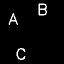

In [ ]:
img = cv2.imread(trainImagesComb[0])
cv2_imshow(img)

In [ ]:
arrayCreate = np.zeros((30))
for i in range(26):
  for j in range(26):
    arrayCreate[int(array[i][j])] = arrayCreate[int(array[i][j])] + 1
print(arrayCreate)

[  0. 534. 116.  26.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.]


In [ ]:
print(testLabels[1])
print(imageValueFunc(array, testLabels[1]))

[1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
7.0


In [ ]:
print(array)

[[20.  1.  1.  1.  2.  1.  1.  2.  1.  2.  1.  1.  1.  1.  2.  2.  1.  3.
   1.  2.  1.  1.  1.  1.  1.  1.]
 [ 1. 20.  1.  2.  1.  1.  2.  1.  2.  1.  2.  1.  1.  2.  1.  3.  2.  1.
   1.  1.  3.  1.  1.  1.  1.  2.]
 [ 1.  1. 20.  1.  1.  2.  1.  1.  1.  1.  2.  1.  2.  3.  1.  1.  2.  1.
   2.  3.  1.  1.  1.  1.  1.  1.]
 [ 1.  2.  1. 20.  1.  1.  2.  1.  1.  1.  2.  1.  2.  1.  1.  1.  2.  1.
   1.  2.  1.  1.  1.  2.  1.  1.]
 [ 2.  1.  1.  1. 20.  2.  1.  2.  1.  2.  1.  2.  1.  1.  3.  1.  4.  1.
   1.  2.  5.  3.  4.  2.  3.  1.]
 [ 1.  1.  2.  1.  2. 20.  1.  2.  1.  2.  1.  2.  1.  2.  1.  1.  2.  1.
   2.  1.  1.  1.  2.  3.  1.  2.]
 [ 1.  2.  1.  2.  1.  1. 20.  1.  1.  1.  2.  1.  2.  3.  1.  1.  2.  1.
   1.  1.  1.  2.  1.  1.  2.  1.]
 [ 2.  1.  1.  1.  2.  2.  1. 20.  1.  2.  1.  1.  1.  2.  1.  1.  1.  2.
   1.  1.  1.  2.  1.  1.  2.  1.]
 [ 1.  2.  1.  1.  1.  1.  1.  1. 20.  1.  1.  1.  1.  2.  1.  2.  2.  1.
   1.  2.  3.  1.  1.  2.  3.  4.]
 [ 2.  1.  1.  1.  

In [ ]:
def pickRandom(trainImages, trainLabels, numOfComb):
  trainImagesNew = []
  trainLabelsNew = []
  for i in range(numOfComb):
    temp = random.randint(0, 2599)
    if trainImages[temp] not in trainImagesNew:
      trainImagesNew.append(trainImages[temp])
      trainLabelsNew.append(trainLabels[temp])
  return _, trainLabelsNew, trainImagesNew

In [70]:
ratio = 32
listValLen = [325, 2000, 2500, 3000, 5000, 10000, 20000]
valueList = [0, 4, 5, 6, 10, 20, 40]
random.seed(1000)
numOfAddedImages = [150,200,300,400,500,1000,1500,2000,2500]
accList = []
for i in range(1):
  length = 2500 + numOfAddedImages[i]
  valueLen = 70
  trainImagesComb, trainLabelsComb = createRatioBased(ratio, testImages, testLabels)
  trainImages, trainLabels = numOfDataInc(trainImagesComb, trainLabelsComb, valueLen, length)
  arrayVal = correlationmt(trainLabelsComb)
  array = calculateDist(arrayVal)
  #_, trainLb, trainImg = imageGenBasedOnLabels(array, 5, numOfAddedImages[i])
  #_, trainLb, trainImg = pickRandom(testImages, testLabels, numOfAddedImages[i])
  #print(len(trainImgComb))
  #trainImg, trainLb = numOfDataInc(trainImgComb, trainLbComb, 100, 5000)
  #img = cv2.imread(trainImgComb[1])
  #cv2_imshow(img)
  #for j in range(len(trainImg)):
    #trainImages.append(trainImg[j])
    #trainLabels.append(trainLb[j])
  print(len(trainImages))
  FinalDataset = create_dataset(trainImages, trainLabels)
  TestDataset = create_dataset(testImagesVal, testLabelsVal, False)
  num_of_letters = 26
  callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, min_delta=0.0002, restore_best_weights=True)
  model = modelDef()
  opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
  model.compile(optimizer=opt,
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])
  history = model.fit(FinalDataset, epochs=400, 
                      validation_data=TestDataset, callbacks=[callback])
  ypred = model.predict(TestDataset)
  acc , combList, correctness = accuracyFunc(ypred, testLabelsVal, array)
  accList.append(acc)
  print(trainImages)
  print(len(trainImages))

82
2650
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 48)        13872     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 48)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 64)          27712     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 256)      

83/83 [==============================] - 3s 34ms/step - loss: 0.3243 - accuracy: 0.8852 - val_loss: 0.3428 - val_accuracy: 0.8847
Epoch 48/400
83/83 [==============================] - 2s 30ms/step - loss: 0.3224 - accuracy: 0.8854 - val_loss: 0.3418 - val_accuracy: 0.8850
Epoch 49/400
83/83 [==============================] - 2s 26ms/step - loss: 0.3205 - accuracy: 0.8857 - val_loss: 0.3410 - val_accuracy: 0.8851
Epoch 50/400
83/83 [==============================] - 2s 26ms/step - loss: 0.3184 - accuracy: 0.8860 - val_loss: 0.3400 - val_accuracy: 0.8851
Epoch 51/400
83/83 [==============================] - 2s 25ms/step - loss: 0.3161 - accuracy: 0.8862 - val_loss: 0.3392 - val_accuracy: 0.8850
Epoch 52/400
83/83 [==============================] - 2s 27ms/step - loss: 0.3143 - accuracy: 0.8864 - val_loss: 0.3395 - val_accuracy: 0.8850
Epoch 53/400
83/83 [==============================] - 2s 24ms/step - loss: 0.3122 - accuracy: 0.8868 - val_loss: 0.3375 - val_accuracy: 0.8850
Epoch 54/400

83/83 [==============================] - 3s 34ms/step - loss: 0.2416 - accuracy: 0.9054 - val_loss: 0.3127 - val_accuracy: 0.8842
Epoch 105/400
83/83 [==============================] - 3s 34ms/step - loss: 0.2405 - accuracy: 0.9056 - val_loss: 0.3117 - val_accuracy: 0.8855
Epoch 106/400
83/83 [==============================] - 3s 31ms/step - loss: 0.2390 - accuracy: 0.9056 - val_loss: 0.3110 - val_accuracy: 0.8855
Epoch 107/400
83/83 [==============================] - 2s 25ms/step - loss: 0.2373 - accuracy: 0.9068 - val_loss: 0.3113 - val_accuracy: 0.8852
Epoch 108/400
83/83 [==============================] - 2s 27ms/step - loss: 0.2355 - accuracy: 0.9070 - val_loss: 0.3122 - val_accuracy: 0.8836
Epoch 109/400
83/83 [==============================] - 2s 29ms/step - loss: 0.2346 - accuracy: 0.9074 - val_loss: 0.3099 - val_accuracy: 0.8854
Epoch 110/400
83/83 [==============================] - 2s 27ms/step - loss: 0.2328 - accuracy: 0.9077 - val_loss: 0.3090 - val_accuracy: 0.8857
Epoch 

Epoch 161/400
83/83 [==============================] - 2s 22ms/step - loss: 0.1745 - accuracy: 0.9300 - val_loss: 0.3004 - val_accuracy: 0.8893
Epoch 162/400
83/83 [==============================] - 2s 22ms/step - loss: 0.1738 - accuracy: 0.9303 - val_loss: 0.3019 - val_accuracy: 0.8905
Epoch 163/400
83/83 [==============================] - 2s 22ms/step - loss: 0.1728 - accuracy: 0.9311 - val_loss: 0.3048 - val_accuracy: 0.8887
Epoch 164/400
83/83 [==============================] - 2s 22ms/step - loss: 0.1719 - accuracy: 0.9315 - val_loss: 0.3028 - val_accuracy: 0.8907
Epoch 165/400
83/83 [==============================] - 2s 24ms/step - loss: 0.1709 - accuracy: 0.9315 - val_loss: 0.3044 - val_accuracy: 0.8907
Epoch 166/400
83/83 [==============================] - 2s 23ms/step - loss: 0.1703 - accuracy: 0.9316 - val_loss: 0.3027 - val_accuracy: 0.8901
Epoch 167/400
83/83 [==============================] - 2s 24ms/step - loss: 0.1698 - accuracy: 0.9323 - val_loss: 0.3046 - val_accuracy:

C:\Users\Kathpal\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Kathpal\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.012 0.889 0.315 0.42 0.278
['C_B_A_0_1.jpg', 'C_A_L_0_1.jpg', 'V_A_D_0_1.jpg', 'F_A_M_0_1.jpg', 'A_Z_G_0_1.jpg', 'I_W_A_0_1.jpg', 'A_X_K_0_1.jpg', 'Q_N_A_0_1.jpg', 'Q_A_S_0_1.jpg', 'Y_A_U_0_1.jpg', 'X_B_C_0_1.jpg', 'E_M_B_0_1.jpg', 'Y_F_B_0_1.jpg', 'B_H_T_0_1.jpg', 'J_B_S_0_1.jpg', 'B_V_L_0_1.jpg', 'O_R_B_0_1.jpg', 'W_R_B_0_1.jpg', 'E_D_C_0_1.jpg', 'P_C_E_0_1.jpg', 'I_C_G_0_1.jpg', 'W_C_H_0_1.jpg', 'V_J_C_0_1.jpg', 'C_L_Y_0_1.jpg', 'C_O_U_0_1.jpg', 'Z_R_C_0_1.jpg', 'D_I_E_0_1.jpg', 'U_D_F_0_1.jpg', 'P_D_H_0_1.jpg', 'D_O_J_0_1.jpg', 'D_L_R_0_1.jpg', 'Y_D_N_0_1.jpg', 'R_D_S_0_1.jpg', 'D_W_Z_0_1.jpg', 'P_E_G_0_1.jpg', 'M_E_I_0_1.jpg', 'E_K_N_0_1.jpg', 'E_S_M_0_1.jpg', 'E_R_P_0_1.jpg', 'Z_E_S_0_1.jpg', 'F_G_R_0_1.jpg', 'I_F_O_0_1.jpg', 'K_P_F_0_1.jpg', 'M_F_U_0_1.jpg', 'F_P_T_0_1.jpg', 'T_V_F_0_1.jpg', 'U_H_G_0_1.jpg', 'T_J_G_0_1.jpg', 'L_G_W_0_1.jpg', 'G_O_S_0_1.jpg', 'G_R_X_0_1.jpg', 'I_H_K_0_1.jpg', 'L_K_H_0_1.jpg', 'H_Q_M_0_1.jpg', 'O_Z_H_0_1.jpg', 'X_H_S_0_1.jpg', 'J_I_S_0_1.jpg', '

In [ ]:
print(accList)

[0.421, 0.434, 0.483, 0.52, 0.613, 0.592]


In [ ]:
acc , combList, correctness = accuracyFunc(ypred, testLabelsVal, array)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.002 0.882 0.172 0.238 0.148


In [ ]:
for i in range(len(f1MaxValues)):
  print(f1Values[i][1])

1.0
1.3333333333333333
2.0
1.3333333333333333
1.3333333333333333
2.0
2.0
1.6666666666666667
1.3333333333333333
2.0
7.0
2.0
1.6666666666666667
2.0
1.3333333333333333
1.6666666666666667
1.0
2.0
2.3333333333333335
2.0
2.6666666666666665
1.0
1.3333333333333333
1.3333333333333333
1.0
1.3333333333333333
1.6666666666666667
1.0
1.6666666666666667
1.3333333333333333
1.6666666666666667
1.3333333333333333
2.0
7.0
2.0
1.6666666666666667
2.0
1.3333333333333333
2.6666666666666665
2.3333333333333335
2.0
2.0
1.0
1.6666666666666667
1.0
1.6666666666666667
1.3333333333333333
1.3333333333333333
2.0
2.0
1.3333333333333333
1.3333333333333333
2.0
1.6666666666666667
1.3333333333333333
7.0
2.3333333333333335
2.0
1.3333333333333333
1.3333333333333333
1.6666666666666667
1.0
2.0
2.6666666666666665
1.0
1.6666666666666667
1.3333333333333333
2.0
1.6666666666666667
2.6666666666666665
1.3333333333333333
2.0
1.6666666666666667
2.3333333333333335
1.3333333333333333
2.0
7.333333333333333
1.6666666666666667
2.666666666666

In [ ]:
for i in range(len(f1MaxValues)):
  print(f1Values[i][0])

0.0
0.0
0.4
0.0
0.3333333333333333
0.0
0.0
0.0
0.0
0.0
0.4
0.0
0.0
0.4
0.0
0.3333333333333333
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.4
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.4
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.8
0.0
0.0
0.0
0.6666666666666666
0.0
0.5
0.6666666666666666
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.3333333333333333
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.5
0.0
0.0
0.0
0.0
0.8
0.0
0.3333333333333333
0.0
0.0
0.5
0.0
0.0
0.5
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.5
0.3333333333333333
0.0
0.0
0.0
0.3333333333333333
0.4
0.4
0.0
0.0
0.4
0.4
0.0
0.0
0.0
0.0
0.0
0.3333333333333333
0.0
0.0
0.0
0.0
0.4
0.6666666666666666
0.0
0.0
0.4
0.0
0.0
0.0
0.0
0.0
0.4
0.4
0.0
0.0
0.0
0.0
0.8
0.28571428571428575
0.0
0.0
0.0
0.0
0.6666666666666666
0.0
0.4
0.4
0.0
0.4
0.5
0.4
0.0
0.4
0.4
0.0
0.0
0.0
0.0
0.0
0.4
0.5
0.5

In [ ]:
acc , combList, correctness = accuracyFunc(ypred, testLabelsVal, array)
listValues = Sort(f1Values)
AverageFValues = []
MaxFValues = []
DistValues = []
dist = listValues[0][1]
sum = 0
count = 0
max = listValues[0][0]
for i in range(len(listValues)):  
  if listValues[i][1] == dist:
    sum = sum + listValues[i][0]
    count = count + 1
    if max < listValues[i][0]:
      max = listValues[i][0]
  else:
    temp_avg = sum / count 
    AverageFValues.append(temp_avg)
    MaxFValues.append(max)
    DistValues.append(dist)
    max = listValues[i][0]
    sum = listValues[i][0]
    dist = listValues[i][1]
    count = 1

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.428 0.967 0.843 0.901 0.82


In [ ]:
print(listValues)

[[0.5, 1.0], [0.8571428571428571, 1.0], [0.8571428571428571, 1.0], [0.8, 1.0], [0.7499999999999999, 1.0], [0.8, 1.0], [0.8, 1.0], [1.0, 1.0], [1.0, 1.0], [0.8571428571428571, 1.0], [1.0, 1.0], [0.6666666666666666, 1.0], [0.8, 1.0], [0.7499999999999999, 1.0], [0.8, 1.0], [1.0, 1.0], [0.8, 1.0], [1.0, 1.0], [0.8571428571428571, 1.0], [1.0, 1.0], [0.8, 1.0], [0.8571428571428571, 1.0], [0.6666666666666666, 1.0], [0.8, 1.0], [1.0, 1.0], [0.4, 1.0], [0.8, 1.0], [0.6666666666666666, 1.0], [0.6666666666666666, 1.0], [0.8, 1.0], [0.8571428571428571, 1.0], [0.8, 1.0], [1.0, 1.0], [0.8, 1.0], [1.0, 1.0], [0.6666666666666666, 1.0], [0.8571428571428571, 1.0], [1.0, 1.0], [0.8, 1.0], [0.6666666666666666, 1.0], [1.0, 1.0], [0.8, 1.0], [0.8, 1.0], [0.8, 1.0], [0.8, 1.0], [0.8, 1.0], [0.8571428571428571, 1.0], [0.8, 1.0], [0.8571428571428571, 1.0], [0.8, 1.0], [1.0, 1.0], [1.0, 1.0], [0.4, 1.0], [0.8571428571428571, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [0.666666

In [ ]:
print(AverageFValues)
print(MaxFValues)
print(DistValues)

[]
[]
[]


In [ ]:
ratio = 4
listValLen = [325, 2000, 2500, 3000, 5000, 10000, 20000]
valueList = [0, 4, 5, 6, 10, 18, 32]
for i in range(5, 7):
  length = listValLen[i]
  valueLen = valueList[i]
  trainImagesComb, trainLabelsComb = createOddEven(testImages, testLabels)
  trainImages, trainLabels = numOfDataInc(trainImagesComb, trainLabelsComb, valueLen, length)
  FinalDataset = create_dataset(trainImages, trainLabels)
  TestDataset = create_dataset(testImagesVal,testLabelsVal, False)
  num_of_letters = 26
  callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, min_delta=0.0002, restore_best_weights=True)
  model = modelDef()
  opt = tf.keras.optimizers.Adam(learning_rate=0.001)
  model.compile(optimizer=opt,
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])
  history = model.fit(FinalDataset, epochs=400, 
                      validation_data=TestDataset, callbacks=[callback], batch_size = batch_size)
  ypred = model.predict(TestDataset)
  acc , combList, correctness = accuracyFunc(ypred, testLabelsVal)
  print(trainImages)
  print(len(trainImages))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 48)        13872     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 48)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          27712     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0 0.885 0.0 0.0 0.0
['A_C_E_0_1.jpg', 'G_A_C_0_1.jpg', 'I_C_A_0_1.jpg', 'C_A_K_0_1.jpg', 'A_C_M_0_1.jpg', 'C_A_O_0_1.jpg', 'Q_A_C_0_1.jpg', 'C_A_S_0_1.jpg', 'C_U_A_0_1.jpg', 'W_A_C_0_1.jpg', 'Y_A_C_0_1.jpg', 'E_G_A_0_1.jpg', 'E_A_I_0_1.jpg', 'E_K_A_0_1.jpg', 'A_E_M_0_1.jpg', 'E_A_O_0_1.jpg', 'A_Q_E_0_1.jpg', 'S_A_E_0_1.jpg', 'U_A_E_0_1.jpg', 'E_W_A_0_1.jpg', 'A_E_Y_0_1.jpg', 'A_I_G_0_1.jpg', 'A_K_G_0_1.jpg', 'A_G_M_0_1.jpg', 'A_G_O_0_1.jpg', 'Q_A_G_0_1.jpg', 'G_A_S_0_1.jpg', 'A_U_G_0_1.jpg', 'W_G_A_0_1.jpg', 'A_Y_G_0_1.jpg', 'I_K_A_0_1.jpg', 'I_M_A_0_1.jpg', 'I_O_A_0_1.jpg', 'Q_I_A_0_1.jpg', 'S_I_A_0_1.jpg', 'A_U_I_0_1.jpg', 'I_W_A_0_1.jpg', 'Y_A_I_0_1.jpg', 'K_M_A_0_1.jpg', 'O_A_K_0_1.jpg', 'K_Q_A_0_1.jpg', 'K_A_S_0_1.jpg', 'A_U_K_0_1.jpg', 'K_A_W_0_1.jpg', 'Y_A_K_0_1.jpg', 'A_O_M_0_1.jpg', 'A_Q_M_0_1.jpg', 'S_M_A_0_1.jpg', 'A_U_M_0_1.jpg', 'W_A_M_0_1.jpg', 'A_Y_M_0_1.jpg', 'A_O_Q_0_1.jpg', 'S_O_A_0_1.jpg', 'U_O_A_0_1.jpg', 'O_A_W_0_1.jpg', 'O_A_Y_0_1.jpg', 'Q_A_S_0_1.jpg', 'A_Q_U_0

In [ ]:
print(len(trainImages))
print(trainImages)
print(trainLabelsNew)

2000
['C_B_A_0_1.jpg', 'V_A_D_0_1.jpg', 'Z_G_A_0_1.jpg', 'A_X_K_0_1.jpg', 'A_Q_S_0_1.jpg', 'B_X_C_0_1.jpg', 'Y_F_B_0_1.jpg', 'S_J_B_0_1.jpg', 'B_R_O_0_1.jpg', 'E_D_C_0_1.jpg', 'G_I_C_0_1.jpg', 'C_J_V_0_1.jpg', 'U_O_C_0_1.jpg', 'D_E_I_0_1.jpg', 'P_H_D_0_1.jpg', 'R_D_L_0_1.jpg', 'R_S_D_0_1.jpg', 'G_P_E_0_1.jpg', 'K_N_E_0_1.jpg', 'E_R_P_0_1.jpg', 'R_G_F_0_1.jpg', 'K_P_F_0_1.jpg', 'F_T_P_0_1.jpg', 'G_H_U_0_1.jpg', 'G_L_W_0_1.jpg', 'G_R_X_0_1.jpg', 'H_L_K_0_1.jpg', 'H_Z_O_0_1.jpg', 'S_J_I_0_1.jpg', 'R_O_I_0_1.jpg', 'J_K_L_0_1.jpg', 'J_O_Z_0_1.jpg', 'K_U_L_0_1.jpg', 'R_K_V_0_1.jpg', 'O_V_L_0_1.jpg', 'N_S_M_0_1.jpg', 'W_M_V_0_1.jpg', 'U_N_Y_0_1.jpg', 'X_O_Y_0_1.jpg', 'V_Q_T_0_1.jpg', 'S_Y_W_0_1.jpg', 'B_A_C_1_1.jpg', 'A_V_D_1_1.jpg', 'G_Z_A_1_1.jpg', 'X_K_A_1_1.jpg', 'S_A_Q_1_1.jpg', 'C_X_B_1_1.jpg', 'Y_B_F_1_1.jpg', 'J_S_B_1_1.jpg', 'B_O_R_1_1.jpg', 'E_D_C_1_1.jpg', 'C_G_I_1_1.jpg', 'J_V_C_1_1.jpg', 'U_C_O_1_1.jpg', 'D_I_E_1_1.jpg', 'D_H_P_1_1.jpg', 'L_R_D_1_1.jpg', 'D_R_S_1_1.jpg', 'E_G_P_1

In [ ]:
testLabelsNew = np.zeros((len(testLabelsVal)))
for i in range(len(testLabelsVal)):
  if testLabelsVal[i][25] == 1:
    testLabelsNew[i] = 1

In [ ]:
print(testImagesNew[0:5])
print(testLabelsNew[0:5])

['C_A_B_0_0.jpg', 'A_B_D_0_0.jpg', 'A_E_B_0_0.jpg', 'B_F_A_0_0.jpg', 'A_B_G_0_0.jpg']
[0. 1. 0. 0. 0.]


In [ ]:
ratio = 32
listValLen = [572, 1000,2000, 2500, 3000, 5000, 10000, 20000]
valueList = [0, 20, 40, 50, 60, 10, 200, 400]
accuracyValues = []
for i in range(5, 6):
  length = listValLen[i]
  valueLen = valueList[i]
  sum_f1 = 0
  num_of_letters = 26
  trainImagesComb, trainLabelsComb = createOddEven(testImages, testLabels)
  print(len(trainLabelsComb))
  trainImages, trainLabels = numOfDataInc(trainImagesComb, trainLabelsComb, valueLen, length)
  print(len(trainLabels))
  for j in range(26):
    trainImagesNew, trainLabelsNew, count = convertLabelsToSingleAlphabet(j, trainImages, trainLabels)
    testImagesNew, testLabelsNew, coun = convertLabelsToSingleAlphabet(j, testImagesVal, testLabelsVal)
    FinalDataset = create_dataset(trainImagesNew, trainLabelsNew)
    TestDataset = create_dataset(testImagesNew, testLabelsNew, False)
    num_of_letters = 1
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta=0.0002, restore_best_weights=True)
    model = modelDef()
    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=opt,
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=['accuracy'])
    history = model.fit(FinalDataset, epochs=400, 
                        validation_data=TestDataset, callbacks=[callback], batch_size = batch_size)
    ypred = model.predict(TestDataset)
    y_pred = np.zeros((len(ypred)))
    for i in range(len(ypred)):
      if ypred[i] > 0.5:
        y_pred[i] = 1
    y_test = testLabelsNew
    temp_score = f1_score(y_test, y_pred)
    temp_recall = recall_score(y_test, y_pred)
    temp_precision = precision_score(y_test, y_pred)
    temp_acc = accuracy_score(y_test, y_pred)
    sum_f1 = sum_f1 + temp_score
    print(trainImages)
    print(len(trainImages))
    print(round(temp_acc,3), round(temp_score,3), round(temp_precision,3), round(temp_recall,3))
  print(sum_f1/26)
  accuracyValues.append([len(trainImages), count, round(temp_acc,3), round((sum_f1/26),3), round(temp_precision,3), round(temp_recall,3)])

572
5000
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 48)        13872     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 48)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 64)          27712     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 256)     

In [ ]:
for i in range(len(accuracyValues)):
  print(accuracyValues[i])

NameError: ignored

In [ ]:
ypred = model.predict(TestDataset)
y_pred = np.zeros((len(ypred)))
for i in range(len(ypred)):
  if ypred[i] > 0.5:
    y_pred[i] = 1
y_test = testLabelsNew
temp_score = f1_score(y_test, y_pred)
temp_recall = recall_score(y_test, y_pred)
temp_precision = precision_score(y_test, y_pred)
temp_acc = accuracy_score(y_test, y_pred)
print(round(temp_acc,3), round(temp_score,3), round(temp_precision,3), round(temp_recall,3))

0.881 0.049 0.308 0.027


In [ ]:
test_degree=3
TestDataset, testLabels, testImages = testSetGen()

In [ ]:
train_degree = 2
times_addition = 0
probability_check = 0.5
max_numbers = [2, 3, 4, 5, 6, 7, 8, 9, 10]
accuracyValues = []
combinedListValues = []
treePlotValues = []
trainImageList = []
trainLabelList = []
arrayList = []
for i in max_numbers:
  max_num = i
  FinalDataset, arrayVal, trainLabels, trainImages = trainSetGen()
  callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, min_delta=0.0002)
  model = modelDef()
  model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])
  history = model.fit(FinalDataset, epochs=400, 
                      validation_data=TestDataset, callbacks=[callback], batch_size = batch_size)
  arrayValues = correlationMatrix(trainLabels)
  arrayList.append(arrayValues)
  #ypred = model.predict(TestDataset)
  #acc , combList, correctness = accuracyFunc(ypred, testLabels)
  acc, probabilityList, correctness, combinedList, comboList = probabilityListAndCorrectness(arrayValues, TestDataset, testLabels)
  #clf = tree.DecisionTreeClassifier(max_depth=1)
  #clf.fit(np.array(probabilityList).reshape(-1, 1), correctness)
  accuracyValues.append(acc)
  combinedListValues.append(combinedList)
  trainImageList.append(trainImages)
  trainLabelList.append(trainLabels)

Streaming output truncated to the last 5000 lines.
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1.]
[6.0139298e-12 1.5421001e-08 5.1094939e-05 1.0000000e+00 9.9662125e-01
 9.9242698e-06 1.4702781e-06 1.9762064e-15 2.8267619e-10 2.3317668e-07
 5.8672608e-08 1.7331865e-10 4.3669506e-13 4.8441772e-16 1.0789784e-09
 7.7996257e-14 6.1550168e-13 2.1300436e-21 7.2912997e-05 1.0815731e-08
 1.3481005e-11 2.1942568e-14 4.3888813e-19 1.0065027e-14 7.9283480e-10
 6.6222605e-10]
[0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
[2.1479056e-09 2.5096094e-09 7.8144494e-06 1.0000000e+00 1.5890118e-03
 9.9997568e-01 1.9809259e-04 1.3311360e-13 8.8725943e-04 7.1459829e-07
 2.0343068e-03 1.7225586e-17 1.1694787e-13 9.7144697e-12 8.3151475e-10
 1.1429621e-07 7.6840612e-19 2.2223619e-19 3.8048517e-15 2.7487710e-08
 2.6982504e-22 4.8789304e-16 4.9398189e-14 3.7614914e-19 4.0313575e-05
 6.3589691e-20]
[0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [ ]:
print(accuracyValues)

[0.7507692307692307, 0.8738461538461538, 0.8953846153846153, 0.9476923076923077, 0.9661538461538461, 0.9476923076923077, 0.9692307692307692, 0.9661538461538461, 0.9661538461538461]


In [ ]:
sumVals = []
for i in range(len(arrayList)):
  temp = 0
  for j in range(26):
    for k in range(26):
      if arrayList[i][j][k] == 0:
        temp = temp + 1
  sumVals.append(temp)

In [ ]:
print(sumVals)

[26]


In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd

for i in range(len(arrayList)):
  listOfAlph = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']
  cm = sns.light_palette("green", as_cmap=True)
  x=pd.DataFrame(arrayList[i])
  x=x.style.background_gradient(cmap=cm).set_precision(5)
  display(x)

In [ ]:
sumVals = []
probabilityValues = []
for i in range(len(combinedListValues)):
  temp = 0
  probTemp = 0
  for j in range(len(combinedListValues[i])):
    #print(probTemp)
    if combinedListValues[i][j][0] == 0:
      if combinedListValues[i][j][1] > probTemp:
        probTemp = combinedListValues[i][j][1]
    if combinedListValues[i][j][1] > 0:
      temp = temp + 1
  sumVals.append(temp)
  probabilityValues.append(probTemp)

In [ ]:
print(probabilityValues)

[0.0030864197530864196]


In [ ]:
sortedList = Sort(combinedListValues[0])
print(len(sortedList))

650


In [ ]:
max_numbers = [2,3,4,5,6,7,8,9,10]
accuracyValuesWithComb = []
add_new_comb = 1
comboListValues = []
testOrTrain = 3
for i in range(len(max_numbers)):
  max_num = max_numbers[i]
  if add_new_comb == 1:
    comboListVal = createComboList(combinedListValues[i], 0)
    print(comboListVal)
    comboListValues.append(comboListVal)
    FinalDataset, arrayVal, trainLabels, trainImages = addingNewImages(trainImageList[i], trainLabelList[i], comboListVal)
  callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, min_delta=0.0002)
  model = modelDef()
  model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])
  history = model.fit(FinalDataset, epochs=400, 
                      validation_data=TestDataset, callbacks=[callback], batch_size = batch_size)
  arrayValues = correlationMatrix(trainLabels)
  acc, probabilityList, correctness, combinedList, comboList = probabilityListAndCorrectness(arrayVal, TestDataset, testLabels)
  accuracyValuesWithComb.append(acc)

Streaming output truncated to the last 5000 lines.
 6.5541968e-08 1.6231279e-06 1.2024660e-10 8.1140388e-06 9.9996138e-01
 1.1555768e-08]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0.]
[7.61703311e-17 2.32115282e-11 9.99944210e-01 8.93748802e-06
 1.89721183e-10 4.86386542e-10 3.49494599e-07 2.02743689e-14
 3.48473399e-12 6.66134810e-08 1.83531204e-10 2.88100151e-11
 6.28381402e-10 9.15178437e-12 1.47619081e-08 1.06732765e-13
 4.11971482e-13 1.25640929e-08 6.22639418e-05 7.38753156e-12
 2.74997198e-08 9.54824060e-08 1.59246843e-13 1.85935614e-10
 8.34134966e-08 9.99998569e-01]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1.]
[7.01611891e-14 5.69724725e-05 1.99946817e-06 1.00000000e+00
 9.96934295e-01 1.00489269e-05 1.04822114e-07 1.07394552e-10
 8.38388907e-12 9.81328299e-08 1.61767211e-10 5.15325402e-04
 4.88612639e-21 6.01280822e-15 2.60595729e-11 9.81961127e-12
 2.56970365e-11 1.63698655e-06 2.69450084e-03 3.91688729e-

In [ ]:
print(len(comboListVal))

74


In [ ]:
print(accuracyValuesWithComb)

[0.7630769230769231, 0.8646153846153846, 0.9107692307692308, 0.9353846153846154, 0.9661538461538461, 0.963076923076923, 0.9815384615384616, 0.9784615384615385, 0.9507692307692308]


In [ ]:
print(accuracyValues)

[1.0]


In [ ]:
print(sumVals)

In [ ]:
print(accuracyValuesWithComb)

In [ ]:
print(accuracyValues)

[0.0, 0.0, 0.038461538461538464, 0.038461538461538464, 0.0, 0.0, 0.0, 0.11538461538461539, 0.038461538461538464]


In [ ]:
print(accuracyValuesWithComb)

In [ ]:
print(accuracyValues)

In [ ]:
print(combinedListValues[0])

In [ ]:
max_num = 2
FinalDataset, arrayVal, trainLabels, trainImages = trainSetGen()
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, min_delta=0.002)
model = modelDef()
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])
history = model.fit(FinalDataset, epochs=400, 
                    validation_data=TestDataset, callbacks=[callback], batch_size = batch_size)
acc, probabilityList, correctness, combinedList, comboList = probabilityListAndCorrectness(arrayVal, TestDataset, testLabels)
clf = tree.DecisionTreeClassifier(max_depth=1)
clf.fit(np.array(probabilityList).reshape(-1, 1), correctness)

In [ ]:
treePlotValues[0]

In [ ]:
images, trainLabelsComb, trainImagesComb = imageGenBasedOnCombinations(combinationList)

In [ ]:
print(trainImagesComb)

In [ ]:
print(sum, sum1)

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=1)
clf.fit(np.array(probabilityList).reshape(-1, 1), correctness)
x = tree.plot_tree(clf)

In [ ]:
print(x)

In [ ]:
print(combinedList)

In [ ]:
sum = 0
for i in range(676):
  if (len(set(comboList[i]).intersection(combList[i])) == 2):
    print(comboList[i], len(set(comboList[i]).intersection(combList[i])))
    sum = sum + 1

In [ ]:
w = np.vstack(trainLabels)
arr = np.zeros([num_of_letters,num_of_letters])
for i in range(0, w.shape[0]):
  for j in range(0, w.shape[1]):
    if(w[i][j] == 1):
      for k in range(j+1, w.shape[1]):
        if(w[i][k] == 1):
          arr[j][k] += 1
          arr[k][j] += 1

In [ ]:
What degree's = 2 (maximum number of probability, what was the threshold number that decision tree classifier picked, what was the correctness of this decision tree classifier)